In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
gpus=tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
from tensorflow.keras.models import Model,load_model
import numpy as np

In [5]:
model=load_model(r"C:\Users\soumi\OneDrive\Desktop\Project Details\Inceptionv3\Inc77-0.9722.hdf5")

In [7]:
import tensorflow as tf
test_dir=r'C:\Users\soumi\OneDrive\Desktop\Project Details\Final Sample\test_data'
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = (224,224),
    label_mode = 'categorical',
    batch_size=172,
    shuffle=False
)

Found 108 files belonging to 5 classes.


In [8]:
#ar contains all the image tensors
ar=np.empty(0)
for im,y in test_set:
    ar=im

In [9]:
y_pred=model.predict(ar)

4/4 [==============================] - 24s 5s/step


In [19]:
#yp contains all the predicted values in one-hot encoding format
list(y_pred)
highest_indices=[np.argmax(vec) for vec in y_pred]
yp=[np.zeros(vec.shape) for vec in y_pred]
list(yp)
for i, highest_index in enumerate(highest_indices):
    yp[i][highest_index]=1
#print(yp)

In [20]:
#yt contains all the true values
yt=np.empty(0)
for im,y in test_set:
    yt=y

In [21]:
labels=test_set.class_names
labels

['Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5']

In [22]:
label=[i for i in range(5)]

In [24]:
#Values are decoded because we can't feed the one-hot encoded values into confusion matrix
#
yt_decoded=[np.argmax(yt[i]) for i in range(108)]
yp_decoded=[np.argmax(yp[i]) for i in range(108)]
conf_matrix=confusion_matrix(yt_decoded,yp_decoded,labels=label)
print(conf_matrix)

[[21  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 26  1  0]
 [ 0  0  0 21  0]
 [ 0  1  0  1 18]]


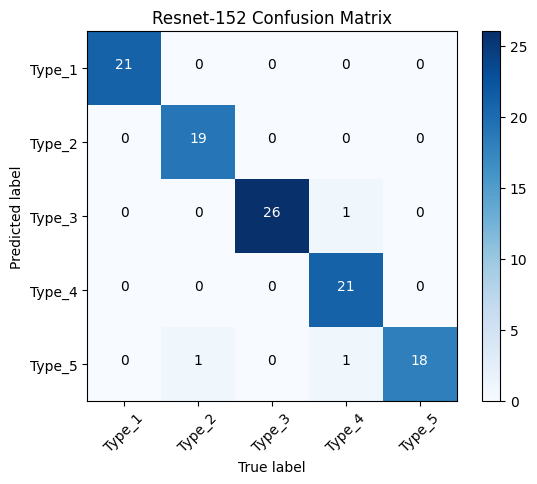

In [25]:
plt.imshow(conf_matrix,interpolation='nearest',cmap='Blues')
plt.title('Resnet-152 Confusion Matrix')
plt.colorbar()
plt.xticks(range(conf_matrix.shape[1]),labels=labels,rotation=45)
plt.yticks(range(conf_matrix.shape[1]),labels=labels)
thresh=conf_matrix.max()/2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j,i,format(conf_matrix[i][j],'d'),horizontalalignment='center',color='white' if conf_matrix[i][j]>thresh else 'black')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [26]:
import numpy as np

# Replace this with your actual confusion matrix
cm = conf_matrix

# Calculate the true positives, false positives, true negatives, and false negatives for each class
tp_0 = cm[0, 0]
fp_0 = cm[0, 1] + cm[0, 2] + cm[0, 3] + cm[0, 4]
tn_0 = cm[1, 1] + cm[1, 2] + cm[1, 3] + cm[1, 4] + cm[2, 1] + cm[2, 2] + cm[2, 3] + cm[2, 4] + cm[3, 1] + cm[3, 2] + cm[3, 3] + cm[3, 4] + cm[4, 1] + cm[4, 2] + cm[4, 3] + cm[4, 4]
fn_0 = cm[1, 0] + cm[2, 0] + cm[3, 0] + cm[4, 0]

tp_1 = cm[1, 1]
fp_1 = cm[1, 0] + cm[1, 2] + cm[1, 3] + cm[1, 4]
tn_1 = cm[0, 0] + cm[0, 3] + cm[0, 2] + cm[0, 4] + cm[2, 0] + cm[2, 2] + cm[2, 3] + cm[2, 4] + cm[3, 0] + cm[3, 2] + cm[3, 3] + cm[3, 4] + cm[4, 0] + cm[1, 2] + cm[4, 3] + cm[4, 4]
fn_1 = cm[0, 1] + cm[2, 1] + cm[3, 1] + cm[4, 1]

tp_2 = cm[2, 2]
fp_2 = cm[2, 0] + cm[2, 1] + cm[2, 3] + cm[2, 4]
tn_2 = cm[0, 0] + cm[0, 1] + cm[0, 3] + cm[0, 4] + cm[1, 1] + cm[1, 0] + cm[1, 3] + cm[1, 4] + cm[3, 0] + cm[3, 1] + cm[3, 3] + cm[3, 4] + cm[4, 0] + cm[4, 1] + cm[4, 3] + cm[4, 4]
fn_2 = cm[1, 2] + cm[0, 2] + cm[3, 2] + cm[4, 2]

tp_3 = cm[3, 3]
fp_3 = cm[3, 0] + cm[3, 1] + cm[3, 2] + cm[3, 4]
tn_3 = cm[0, 0] + cm[0, 1] + cm[0, 2] + cm[0, 4] + cm[1, 1] + cm[1, 0] + cm[1, 2] + cm[1, 4] + cm[3, 0] + cm[3, 1] + cm[3, 2] + cm[3, 4] + cm[4, 0] + cm[4, 1] + cm[4, 2] + cm[4, 4]
fn_3 = cm[1, 3] + cm[2, 3] + cm[0, 3] + cm[4, 3]

tp_4 = cm[4, 4]
fp_4 = cm[4, 0] + cm[4, 1] + cm[4, 2] + cm[4, 3]
tn_4 = cm[0, 0] + cm[0, 1] + cm[0, 2] + cm[0, 3] + cm[1, 1] + cm[1, 0] + cm[1, 2] + cm[1, 3] + cm[3, 0] + cm[3, 1] + cm[3, 2] + cm[3, 3] + cm[4, 0] + cm[4, 1] + cm[4, 3] + cm[4, 2]
fn_4 = cm[1, 4] + cm[2, 4] + cm[3, 4] + cm[0, 4]

# Calculate the precision, recall, and F1-score for each class
accuracy_0=(tp_0+tn_0)/(tp_0+tn_0+fp_0+fn_0)
precision_0 = tp_0 / (tp_0 + fp_0)
recall_0 = tp_0 / (tp_0 + fn_0)
f1_score_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0)

accuracy_1=(tp_1+tn_1)/(tp_1+tn_1+fp_1+fn_1)
precision_1 = tp_1 / (tp_1 + fp_1)
recall_1 = tp_1 / (tp_1 + fn_1)
f1_score_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1)

accuracy_2=(tp_2+tn_2)/(tp_2+tn_2+fp_2+fn_2)
precision_2 = tp_2 / (tp_2 + fp_2)
recall_2 = tp_2 / (tp_2 + fn_2)
f1_score_2 = 2 * precision_2 * recall_2 / (precision_2 + recall_2)

accuracy_3=(tp_3+tn_3)/(tp_3+tn_3+fp_3+fn_3)
precision_3 = tp_3 / (tp_3 + fp_3)
recall_3 = tp_3 / (tp_3 + fn_3)
f1_score_3 = 2 * precision_3 * recall_3 / (precision_3 + recall_3)

accuracy_4=(tp_4+tn_4)/(tp_4+tn_4+fp_4+fn_4)
precision_4 = tp_4 / (tp_4 + fp_4)
recall_4 = tp_4 / (tp_4 + fn_4)
f1_score_4 = 2 * precision_4 * recall_4 / (precision_4 + recall_4)

print("Accuracy:", accuracy_0,accuracy_1,accuracy_2,accuracy_3,accuracy_4)
print("Precision:", precision_0, precision_1, precision_2, precision_3, precision_4)
print("Recall:", recall_0, recall_1, recall_2, recall_3, recall_4)
print("F1-score:", f1_score_0, f1_score_1, f1_score_2, f1_score_3, f1_score_4)

Accuracy: 1.0 0.9907407407407407 0.9907407407407407 0.975609756097561 0.9759036144578314
Precision: 1.0 1.0 0.9629629629629629 1.0 0.9
Recall: 1.0 0.95 1.0 0.9130434782608695 1.0
F1-score: 1.0 0.9743589743589743 0.9811320754716981 0.9545454545454545 0.9473684210526316


In [30]:
Type_1=[accuracy_0,precision_0,recall_0,f1_score_0]
Type_2=[accuracy_1,precision_1,recall_1,f1_score_1]
Type_3=[accuracy_2,precision_2,recall_2,f1_score_2]
Type_4=[accuracy_3,precision_3,recall_3,f1_score_3]
Type_5=[accuracy_4,precision_4,recall_4,f1_score_4]

In [31]:
accuracy=[accuracy_0,accuracy_1,accuracy_2,accuracy_3,accuracy_4]
precision=[precision_0,precision_1,precision_2,precision_3,precision_4]
recall=[recall_0, recall_1, recall_2, recall_3, recall_4]
f1_score=[f1_score_0, f1_score_1, f1_score_2, f1_score_3, f1_score_4]

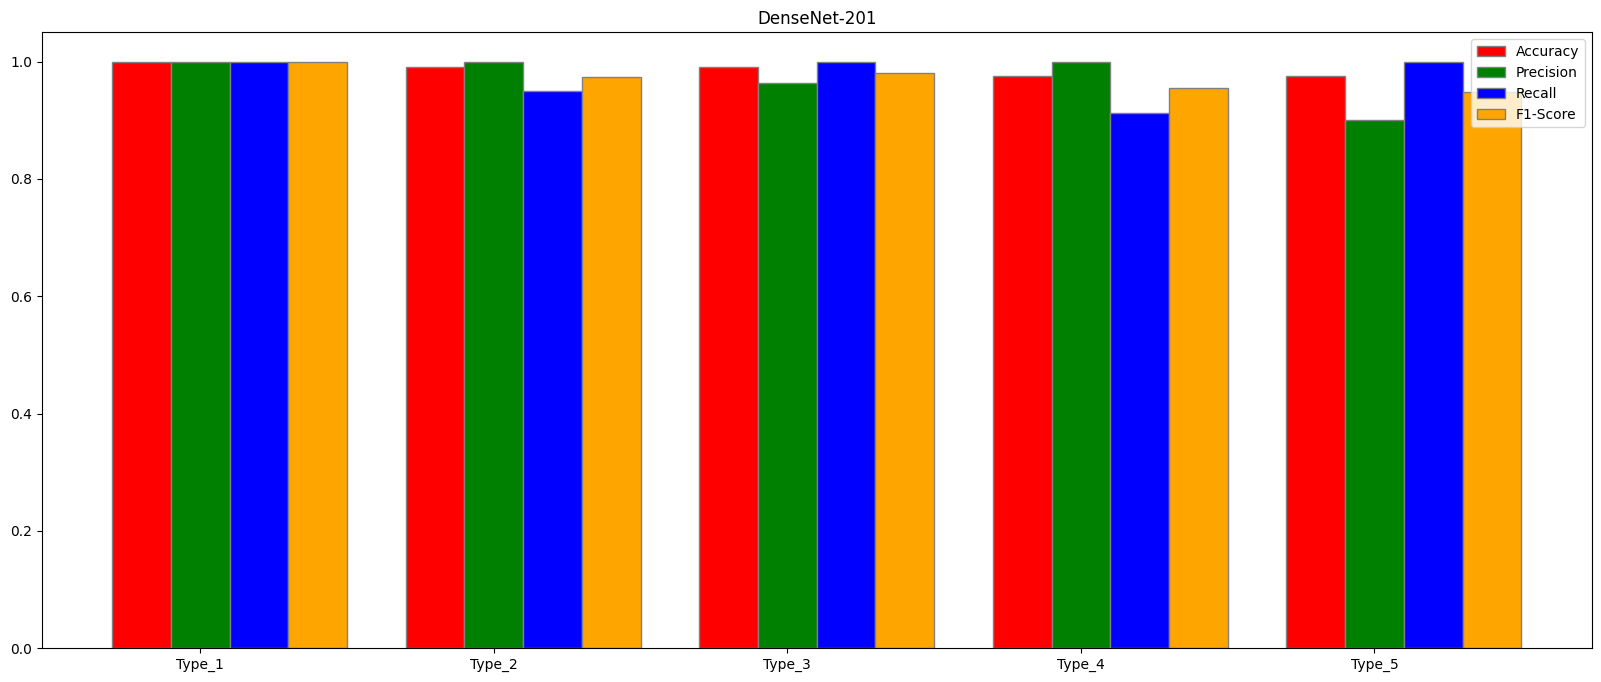

In [32]:
width=0.20
fig=plt.subplots(figsize=(20,8))
#set position of the bar on X-axis
classes=['Type_1','Type_2','Type_3','Type_4','Type_5']
br1=np.arange(len(classes))
#Make the plot
plt.bar(br1,accuracy,color='red',width=width,edgecolor='grey',label='Accuracy')
plt.bar(br1+width,precision,color='green',width=width,edgecolor='grey',label='Precision')
plt.bar(br1+2*width,recall,color='blue',width=width,edgecolor='grey',label='Recall')
plt.bar(br1+3*width,f1_score,color='orange',width=width,edgecolor='grey',label='F1-Score')
plt.xticks([r+width for r in range(len(classes))],classes)
plt.legend()
plt.title("DenseNet-201")
plt.show()